<a href="https://colab.research.google.com/github/ummugulsumm/Patika-JavaScript/blob/master/ysa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ummugulsumm","key":"a92a25679f34e98e7928201a0569b85a"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                             DAIGT V2 Train Dataset                          29MB  2023-11-16 01:38:36           2441        223  1.0              
thedevastator/global-video-game-sales-and-ratings           Global Video Game Sales and Ratings             71KB  2023-12-20 06:46:32           1181         27  0.9411765        
muhammadbinimran/housing-price-prediction-data              Housing Price Prediction Data                  763KB  2023-11-21 17:56:32          11146        187  1.0              
henryshan/2023-data-scientists-salary                       2023 Data Scientists Salary                  

In [8]:
!kaggle datasets download -d nguyngiabol/colorful-fashion-dataset-for-object-detection

 93% 97.0M/104M [00:02<00:00, 58.4MB/s]
100% 104M/104M [00:02<00:00, 45.6MB/s] 


In [9]:
!unzip colorful-fashion-dataset-for-object-detection.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/124571.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/124577.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/12459.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/124629.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/124731.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/124775.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/12484.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/12486.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/125095.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/125257.txt  
  inflating: colorful_fashion_dataset_for_object_detection/Annotations_txt/1

In [10]:
# Install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.8 MB/s eta 0:00:00


In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob

In [12]:
images_path = 'colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = 'colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = 'colorful_fashion_dataset_for_object_detection/'

In [13]:
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 305MB/s]


WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.



100%|██████████| 151k/151k [00:00<00:00, 9.55MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/GRdCC.jpg: 448x640 1 person, 1 bicycle, 5 cars, 1 truck, 104.9ms
Speed: 13.7ms preprocess, 104.9ms inference, 850.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


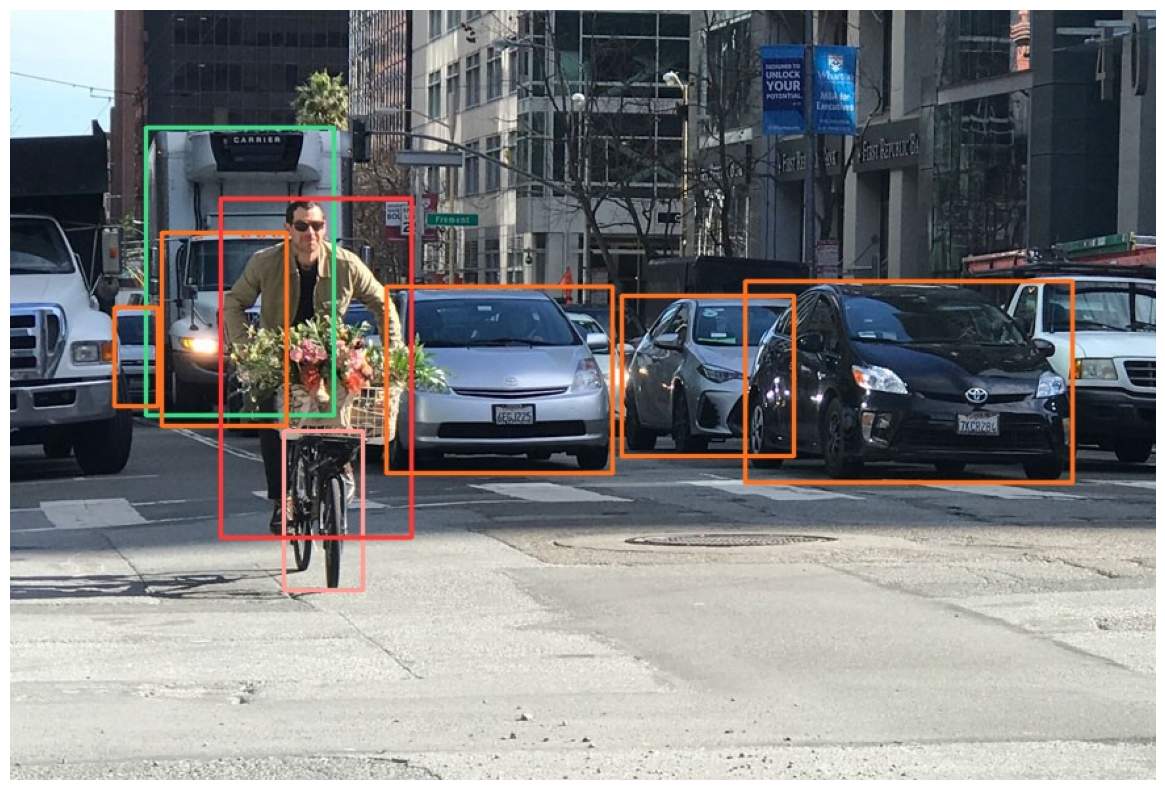

In [14]:
# choose random image
img = random.choice(os.listdir(images_path))

i=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True, line_thickness=2, hide_labels=False)

im = plt.imread('runs/detect/predict/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)

In [15]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])

            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

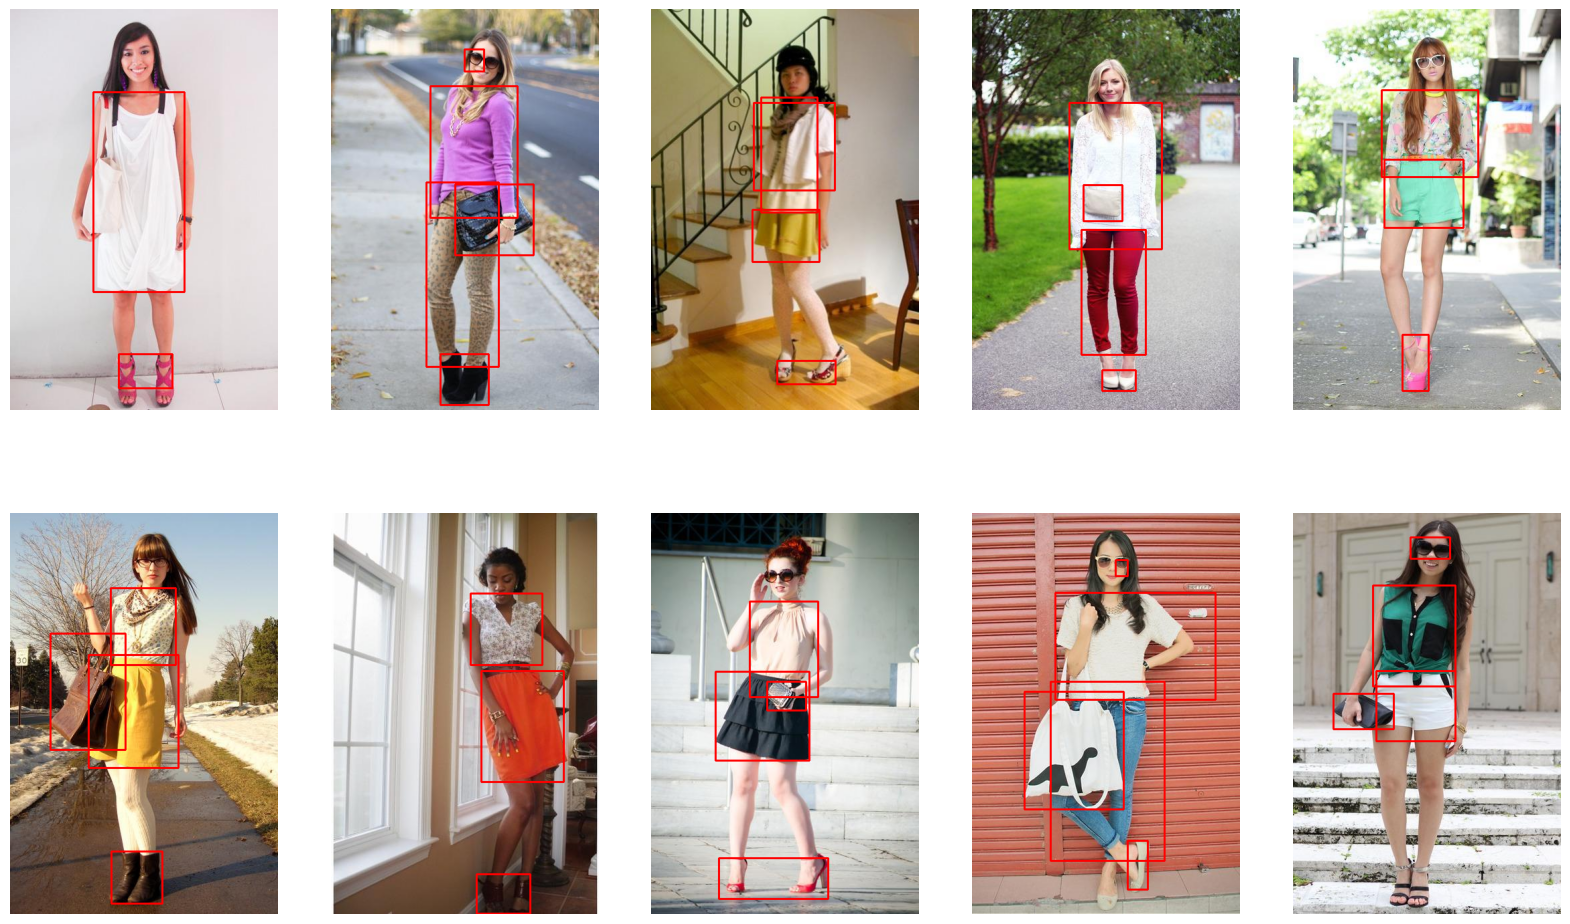

In [16]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

In [17]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [18]:
len(train), len(test)

(2145, 537)

In [19]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [20]:
train_path = 'train/'
test_path = 'test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:00<00:00, 4913.90it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:00<00:00, 3070.15it/s]


In [21]:
text = """
train: train
val: test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [23]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5)

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=5, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=

100%|██████████| 755k/755k [00:00<00:00, 27.9MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 114MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 2001.31it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 1077.03it/s]


val: New cache created: /content/datasets/test/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      7.01G        1.3      1.834       1.43         14        640: 100%|██████████| 135/135 [01:16<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.93it/s]

                   all        537       2035       0.62      0.669       0.67      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      7.25G      1.238      1.224       1.37          8        640: 100%|██████████| 135/135 [01:12<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]

                   all        537       2035      0.698      0.666      0.703      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      7.24G      1.214      1.139       1.36          7        640: 100%|██████████| 135/135 [01:12<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.33it/s]

                   all        537       2035      0.677      0.706      0.726      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      7.24G      1.177      1.032      1.337          7        640: 100%|██████████| 135/135 [01:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.24it/s]

                   all        537       2035      0.758      0.725      0.762      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      7.26G      1.154     0.9843      1.329         11        640: 100%|██████████| 135/135 [01:12<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.25it/s]

                   all        537       2035      0.738      0.741      0.761      0.506



5 epochs completed in 0.122 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]


                   all        537       2035      0.739      0.741      0.761      0.506
              sunglass        537         82      0.727      0.195      0.327       0.12
                   hat        537         77       0.74      0.714      0.741      0.451
                jacket        537        181      0.762       0.78      0.832      0.627
                 shirt        537        366      0.774      0.814       0.82      0.574
                 pants        537        114      0.725      0.947      0.956      0.735
                shorts        537        107      0.791      0.841      0.826      0.508
                 skirt        537        186      0.714      0.806      0.812      0.619
                 dress        537        128      0.626      0.828       0.74      0.558
                   bag        537        274      0.763      0.693      0.757      0.419
                  shoe        537        520      0.765      0.789      0.802      0.449
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x783be9d0d090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

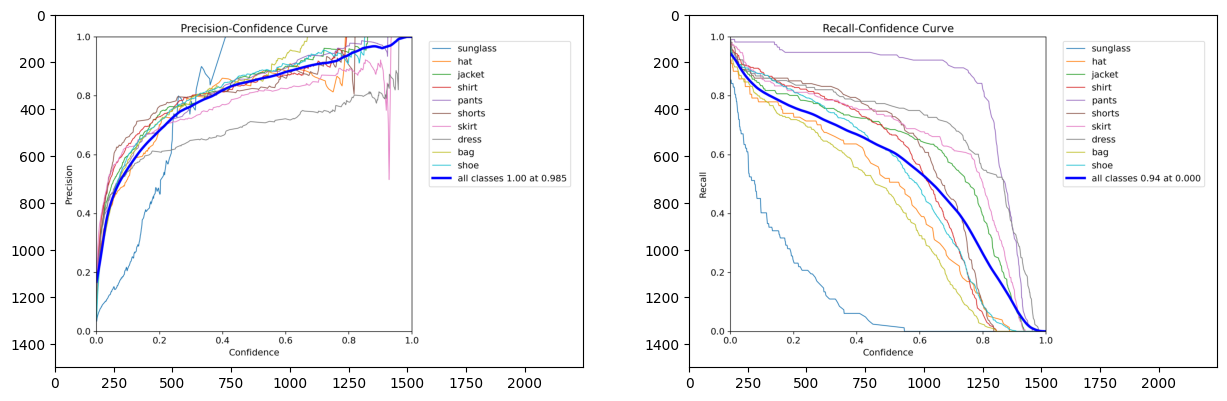

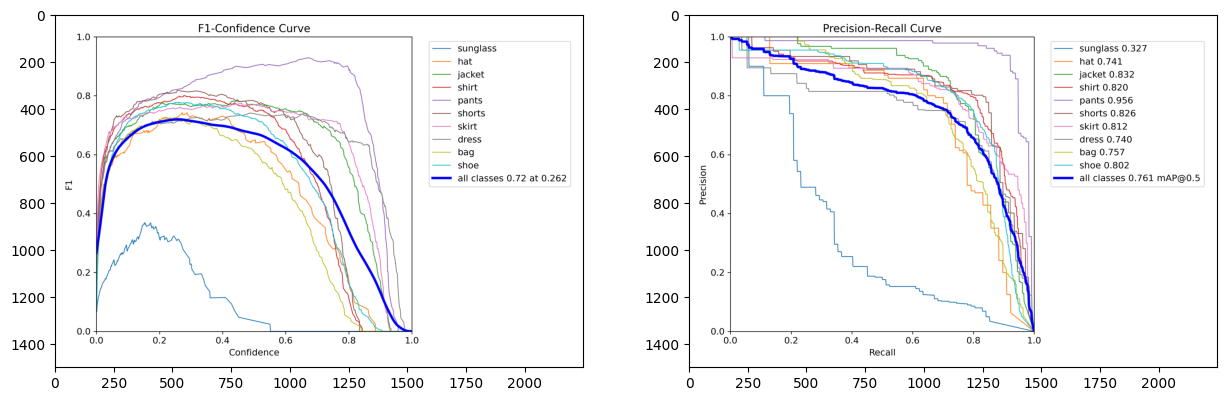

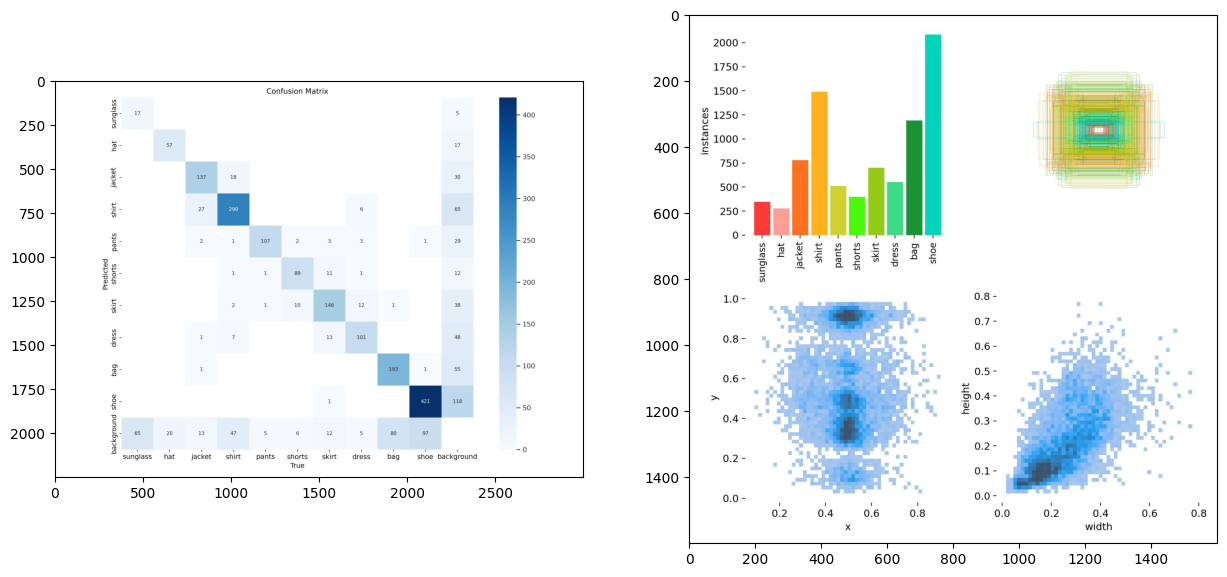

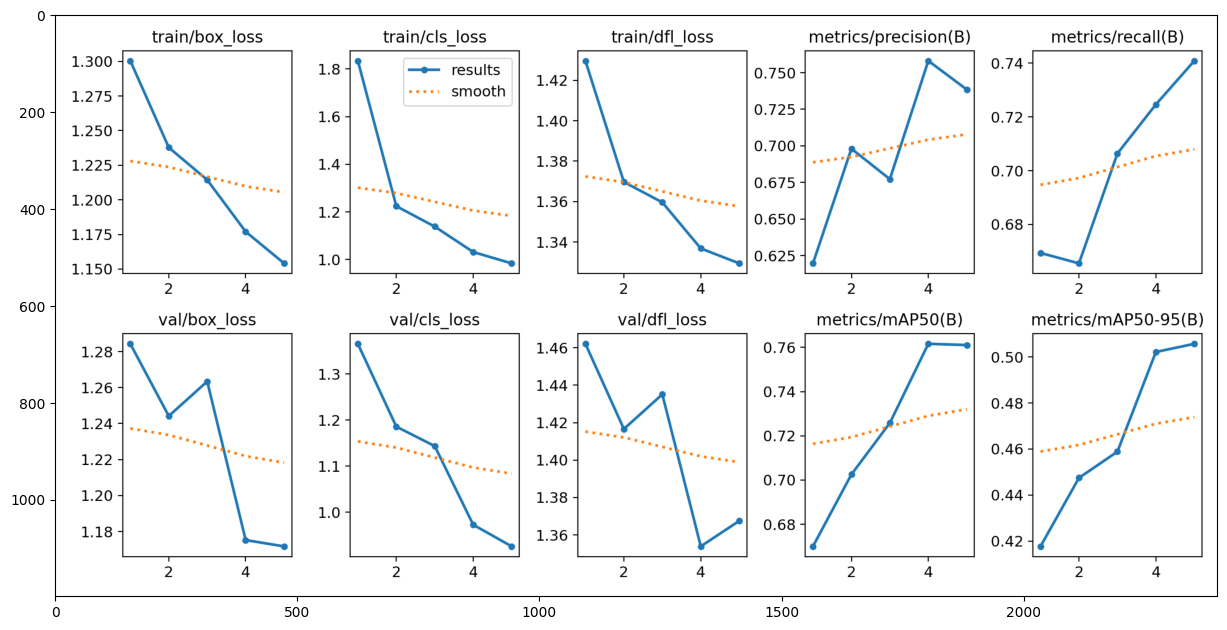

In [24]:
%matplotlib inline
model_path = 'runs/detect/train2/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')